# Определение перспективного тарифа для телеком компании
---
<a id = "Head"></a>

### *Описание проекта* ### 

Федеральный оператор сотовой связи предлагает клиентам два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, надо понять, какой тариф приносит больше денег.

Необходимо сделать предварительный анализ тарифов на выборке из 500 клиентов. Данные содержат в себе следующую информацию о клиентах: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.


### *Описание данных* ###

В нашем распоряжении следующие таблицы с данными:

1. Таблица **users** (информация о пользователях):

   - user_id — уникальный идентификатор пользователя
   - first_name — имя пользователя
   - last_name — фамилия пользователя
   - age — возраст пользователя (годы)
   - reg_date — дата подключения тарифа (день, месяц, год)
   - churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
   - city — город проживания пользователя
   - tariff — название тарифного плана


2. Таблица **calls** (информация о звонках):

   - id — уникальный номер звонка
   - call_date — дата звонка
   - duration — длительность звонка в минутах
   - user_id — идентификатор пользователя, сделавшего звонок


3. Таблица **messages** (информация о сообщениях):

    - id — уникальный номер сообщения
    - message_date — дата сообщения
    - user_id — идентификатор пользователя, отправившего сообщение


4. Таблица **internet** (информация об интернет-сессиях):

    - id — уникальный номер сессии
    - mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
    - session_date — дата интернет-сессии
    - user_id — идентификатор пользователя


5. Таблица **tariffs** (информация о тарифах):

    - tariff_name — название тарифа
    - rub_monthly_fee — ежемесячная абонентская плата в рублях
    - minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
    - messages_included — количество сообщений в месяц, включённых в абонентскую плату
    - mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
    - rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
    - rub_per_message — стоимость отправки сообщения сверх тарифного пакета
    - rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

### *План выполнения проекта:*
***

1. [Изучение общей информации о предоставленных данных;](#Step1)
2. [Подготовка данных для анализа;](#Step2)
3. [Анализ данных;](#Step3)
4. [Проверка гипотез;](#Step4)
5. [Общий вывод по проекту.](#Step5)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import math

### Шаг 1. Изучение общей информации о предоставленных данных


<a id = "Step1"></a>

 [2](#Step2)  [3](#Step3)  [4](#Step4)  [5](#Step5)  [Начало](#Head)

In [2]:
calls = pd.read_csv(r'C:\Users\vladi\Downloads\data_for_analysis\calls.csv')
internet = pd.read_csv(r'C:\Users\vladi\Downloads\data_for_analysis\internet.csv')
sms = pd.read_csv(r'C:\Users\vladi\Downloads\data_for_analysis\messages.csv')
tariffs = pd.read_csv(r'C:\Users\vladi\Downloads\data_for_analysis\tariffs.csv')
users = pd.read_csv(r'C:\Users\vladi\Downloads\data_for_analysis\users.csv')

In [3]:
users.sample(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
57,1057,43,NaN,Москва,Динара,Дьячкова,2018-03-12,ultra
482,1482,68,NaN,Санкт-Петербург,Алина,Блохина,2018-02-28,smart
319,1319,70,NaN,Санкт-Петербург,Харитон,Парфенов,2018-08-24,smart
128,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra
29,1029,51,NaN,Екатеринбург,Алексей,Селезнев,2018-09-15,smart
269,1269,31,NaN,Омск,Аким,Ахмадулин,2018-07-17,smart
277,1277,30,NaN,Новосибирск,Валерия,Андреенко,2018-02-19,ultra
203,1203,39,NaN,Москва,Владимир,Григорьев,2018-03-13,ultra
193,1193,55,NaN,Тамбов,Арсен,Безруков,2018-01-01,smart
404,1404,61,NaN,Иркутск,Роберт,Уваров,2018-04-18,smart


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [5]:
users['city'].value_counts()

Москва             99
Санкт-Петербург    39
Новосибирск        16
Омск               14
Казань             14
                   ..
Химки               1
Нижневартовск       1
Иваново             1
Подольск            1
Архангельск         1
Name: city, Length: 76, dtype: int64

In [6]:
users['tariff'].value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

---
В данной таблице представлена общая информация о клиентах сотового оператора. Клиенты взяты из 76 городов, большая часть проживает в Москве. Тарифом "Смарт" пользуется 351 клиент, тарифом "Ультра" - 149.

В столбцах "Дата прекращения пользования тарифом" и "Дата подключения тарифа" использованы неправильные типы данных.

In [7]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [8]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


---
В этой таблице содержится описание тарифов со всеми условиями. Все данные заполнены корректно.

In [9]:
calls.sample(10)

,id,call_date,duration,user_id
85222,1213_268,2018-12-28,17.04,1213
76783,1193_45,2018-06-17,19.97,1193
111345,1285_273,2018-10-03,0.00,1285
83937,1209_99,2018-10-12,16.13,1209
113383,1291_9,2018-08-15,8.31,1291
57461,1145_292,2018-08-23,10.92,1145
23190,1059_274,2018-08-07,10.96,1059
30006,1076_298,2018-08-09,14.05,1076
65908,1168_1059,2018-09-14,0.00,1168
195715,1480_26,2018-08-08,0.00,1480


In [10]:
print('Данные сформированы за период с', calls['call_date'].min(), 'по', calls['call_date'].max())

Данные сформированы за период с 2018-01-01 по 2018-12-31


In [11]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [12]:
print('Пользовались звонками:', len(calls['user_id'].value_counts()), 'клиента')

Пользовались звонками: 492 клиента


___
В таблице содержатся данные по звонкам рассматриваемых клиентов. Всего 202607 наблюдений. В столбце "Дата звонка"  использован неправильный тип данных. 
Судя по количеству ID 8 человек вообще не пользовались звонками.

In [13]:
sms.sample(10)

,id,message_date,user_id
30338,1134_56,2018-08-31,1134
58046,1256_130,2018-10-23,1256
106373,1431_115,2018-03-30,1431
43251,1187_4,2018-09-06,1187
17548,1076_697,2018-10-13,1076
78915,1331_138,2018-08-05,1331
13353,1055_319,2018-01-23,1055
121497,1491_296,2018-06-20,1491
50481,1226_157,2018-07-05,1226
101347,1414_291,2018-12-12,1414


In [14]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [15]:
print('Данные сформированы за период с', sms['message_date'].min(), 'по', sms['message_date'].max())

Данные сформированы за период с 2018-01-02 по 2018-12-31


In [16]:
print('Отправляли сообщения:', len(sms['user_id'].value_counts()), 'клиентов')

Отправляли сообщения: 426 клиентов


***
В таблице о сообщениях содержится 123036 строк. Столбец "Дата сообщения" имеет неправильный тип данных. Из 500 клиентов смс пользовались только 426.

In [17]:
internet.sample(10)

,Unnamed: 0,id,mb_used,session_date,user_id
142682,142682,1478_46,231.95,2018-07-26,1478
33800,33800,1118_417,402.78,2018-05-02,1118
44271,44271,1152_489,785.73,2018-08-01,1152
63354,63354,1216_11,405.89,2018-12-23,1216
113316,113316,1384_26,0.00,2018-04-27,1384
102821,102821,1345_0,689.98,2018-06-06,1345
23538,23538,1079_141,209.24,2018-07-26,1079
137765,137765,1463_58,382.12,2018-11-29,1463
72482,72482,1244_314,151.54,2018-08-16,1244
136281,136281,1457_123,671.80,2018-04-12,1457


In [18]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [19]:
print('Данные сформированы за период с', internet['session_date'].min(), 'по', internet['session_date'].max())

Данные сформированы за период с 2018-01-01 по 2018-12-31


In [20]:
print('Пользовались мобильным интернетом:', len(internet['user_id'].value_counts()), 'клиентов')

Пользовались мобильным интернетом: 497 клиентов


---
Как и в предыдущих таблицах столбец с датой имеет неправильный тип данных. Судя по количеству ID 3 клиента не использовали интернет. Присутствует столбец "Unnamed: 0", дублирующий столбец с индексами. Избавимся от него на следующем шаге.

### Шаг 2. Подготовка данных для анализа

<a id = "Step2"></a>

[1](#Step1) [3](#Step3)  [4](#Step4)  [5](#Step5)  [Начало](#Head)

**Информация о пользователях**

***
В данной таблице необходимо исправить тип данных в столбцах, относящихся к датам. В столбце 'churn_date' большинство значений пропущено, но заполнять из не требуется. Эти пустые значения говорят нам о том, что на момент выгрузки клиент пользовалася услугами оператора.

In [21]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format = '%Y-%m-%d')

In [22]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d')

**Информация о звонках**

---

In [23]:
calls.head(6)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000


В столбце "Дата звонка" использован неправильный тип данных. Переведем его в специальный тип для даты и времени. 

In [24]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')

In [25]:
print('Количество звонков с длительностью 0 минут:', 
      len(calls[calls['duration'] == 0]),'(', 
      "{:.2%}".format(len(calls[calls['duration'] == 0]) / len(calls)),')')

Количество звонков с длительностью 0 минут: 39613 ( 19.55% )


Необходимо округлить вверх значение минут.
***
*Почти 20% звонков имеют продолжительность 0.00 минут. Что это за неудавшиеся звонки? Если они не состоялись, то почему они попали в эту таблицу? 
У меня есть два предположения на этот счет:*
1. *В значениях продолжительности звонка после запятой указаны не секунды, а доля минуты. Возможно, что такие звонки отклонялись мгновенно  после соединения (за тысячные доли минуты), и в реестр попадали попадали значения с нулями.*
2. *В интернете можно найти статьи о том, что операторы снимают деньги (либо списывают минуты, в зависимости от тарифа) за прослушивание сообщения о недоступности вызываемого абонента. Вероятно, что длительность звонков на недоступные номера фиксируется именно таким образом, со значением 0.*

Считаю, что игнорировать эти значения нельзя и необходимо округлить их до 1 минуты.
***


In [27]:
def round_up(n):
    if n == 0:
        return 1
    else:
        return math.ceil(n)

In [28]:
calls['duration'] = calls['duration'].apply(round_up)

In [30]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,1,1000
1,1000_1,2018-08-17,1,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


---
Если оставить нулевые значения как есть или удалить их вовсе, мы можем не досчитаться части выручки. Если логика была верной и несостоявшиеся звонки тоже тарифицируются, то неучет этих данных может привести к ошибочным выводам по результатам анализа. Также это повлияет на среднюю продолжительность телефонного разговора. 

**Информация о сообщениях**

---
В столбце "Дата сообщения" использован неправильный тип данных.

In [31]:
sms['message_date'] = pd.to_datetime(sms['message_date'], format = '%Y-%m-%d')

In [32]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


**Информация об интернет-сессиях**

---
В данной таблице необходимо изменить тип данных столбца с датами, убрать лишний столбец - дублер индексов и округлить объем использованых мегабайтов за сессию.

In [33]:
internet.sample(5)

,Unnamed: 0,id,mb_used,session_date,user_id
4598,4598,1014_204,413.13,2018-09-25,1014
108807,108807,1372_175,289.53,2018-07-07,1372
23388,23388,1078_305,379.98,2018-12-17,1078
51007,51007,1174_215,625.96,2018-10-28,1174
109636,109636,1373_558,310.64,2018-02-06,1373


In [34]:
internet = internet.drop('Unnamed: 0', axis=1)

In [35]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')

In [36]:
print('Количество интернет-сессий с объёмом потраченного трафика 0 мб:', 
      len(internet[internet['mb_used'] == 0]),'(',
     "{:.2%}".format(len(internet[internet['mb_used'] == 0]) / len(internet)),')')

Количество интернет-сессий с объёмом потраченного трафика 0 мб: 19598 ( 13.12% )


---
В таблице содержится много нулевых значений в столбце с объемом потраченного интернет-трафика. Скороее всего таким образом учитываются очень короткие интернет-сессии, ведь проверка почты или отправка сообщения в мессенджере не потребляет много трафика. 1 мб = 1024 Кб, а значения в данном столбце округлены до друх знаков после запятой. 

Округлим потраченные мегабайты по тому же принципу, что и продолжительнсть звонков.

In [37]:
internet['mb_used'] = internet['mb_used'].apply(round_up)

##### Создадим дополнительный столбец c названием месяца в таблицах calls, sms и internet 

In [38]:
calls['month'] = calls['call_date'].dt.month_name()

In [39]:
sms['month'] = sms['message_date'].dt.month_name()

In [40]:
internet['month'] = internet['session_date'].dt.month_name()

***Сгруппируем каждую из этих таблиц по идентификаторам пользователей и месяцам. Дополнительно добавим новые столбцы с расчетными показателями.***

___
Для начала сгруппируем таблицу "calls" по столбцам 'user_id' и 'month'. Рассчитаем количество сделанных звонков и израсходованных минут разговора по месяцам.

In [41]:
calls_gr = calls.groupby(['user_id', 'month'])['duration'].agg(['count', 'sum']).reset_index()
#calls_gr

In [42]:
calls_gr.columns = ['user_id', 'month', 'number_of_calls', 'spent_minutes']

In [43]:
len(calls_gr['user_id'].unique())

492

---
Сгруппируем таким же образом таблицу "sms" и  рассчитаем количество отправленных сообщений по месяцам.

In [44]:
sms_gr = sms.groupby(['user_id', 'month'])['id'].agg(['count']).reset_index()
#sms_gr

In [45]:
sms_gr.columns = ['user_id', 'month', 'number_of_sms']

In [46]:
len(sms_gr['user_id'].unique())

426

---
Теперь сделаем таблицу с объёмом израсходованного интернет-трафика по месяцам для каждого клиента.

In [47]:
internet_gr = internet.groupby(['user_id', 'month'])['mb_used'].agg(['sum']).reset_index()
#internet_gr

In [48]:
internet_gr.columns = ['user_id', 'month', 'spent_mb']

In [49]:
len(internet_gr['user_id'].unique())

497

---
**На данном этапе удалось посчитать для каждого пользователя:**
1. количество сделанных звонков и израсходованных минут разговора по месяцам;
2. количество отправленных сообщений по месяцам;
3. объем израсходованного интернет-трафика по месяцам.

**Подготовим единую таблицу с помесечной пользовательской активностью для каждого клиента.**

Для этого необходимо соединить сгруппированные ранее таблицы. Слияние будем производить на основе столбцов c id и  месяцами.

In [50]:
stat = calls_gr.merge(sms_gr, on = ['user_id', 'month'], how = 'outer')

In [51]:
stat = stat.merge(internet_gr, on = ['user_id', 'month'], how = 'outer')

In [52]:
stat

,user_id,month,number_of_calls,spent_minutes,number_of_sms,spent_mb
0,1000,August,52.0,418.0,81.0,14072.0
1,1000,December,46.0,341.0,70.0,9829.0
2,1000,July,47.0,346.0,75.0,14017.0
3,1000,June,43.0,187.0,60.0,23262.0
4,1000,May,22.0,164.0,22.0,2257.0
...,...,...,...,...,...,...
3209,1489,December,NaN,NaN,35.0,17349.0
3210,1489,November,NaN,NaN,20.0,17526.0
3211,1489,October,NaN,NaN,21.0,19599.0
3212,1489,September,NaN,NaN,32.0,17246.0


In [53]:
stat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          3214 non-null   int64  
 1   month            3214 non-null   object 
 2   number_of_calls  3174 non-null   float64
 3   spent_minutes    3174 non-null   float64
 4   number_of_sms    2717 non-null   float64
 5   spent_mb         3203 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 175.8+ KB


In [54]:
stat.isna().sum()

user_id              0
month                0
number_of_calls     40
spent_minutes       40
number_of_sms      497
spent_mb            11
dtype: int64

In [55]:
print('Уникальных клиентов в таблице:', len(stat['user_id'].unique()), 'человек')

Уникальных клиентов в таблице: 498 человек


___
В полученной таблице имеются пропущенные значения. Очевидно, это связано с тем, что часть клиентов просто не пользовалась всеми услугами, поэтому будет логично заполнить все пропуски нулями. Плюс ко всему мы потеряли из выборки двух человек. Следует найти их id и проверить не совершили ли мы ошибку. 

In [56]:
stat = stat.fillna(0)

Найдем двух пропавших клиентов:

In [57]:
lost = users.query('user_id not in @calls.user_id & user_id not in @sms.user_id & user_id not in @internet.user_id')
lost

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
128,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra
371,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart


Действительно, в выборке присутствуют два человека, которые стали клиентами оператора в декабре 2018 года и спустя  непродолжительное время отключили свои тарифы. При этом за ними не наблюдалось никакой активности.
Так или иначе их необходимо добавить в нашу отчетную таблицу, так как при подключении они вносили ежемесячную абонентскую плату.

In [58]:
# Создадим вспомогательный словарь для заполнения пустых значений:
values = {'month': 'December','number_of_calls': 0, 'spent_minutes': 0, 'number_of_sms':0, 'spent_mb':0}

In [59]:
stat = stat.merge(lost['user_id'], on = ['user_id'], how = 'outer').fillna(value=values)

In [60]:
stat.tail(5)

,user_id,month,number_of_calls,spent_minutes,number_of_sms,spent_mb
3211,1489,November,0.0,0.0,20.0,17526.0
3212,1489,October,0.0,0.0,21.0,19599.0
3213,1489,September,0.0,0.0,32.0,17246.0
3214,1128,December,0.0,0.0,0.0,0.0
3215,1371,December,0.0,0.0,0.0,0.0


Для удобства поменяем в столбцах number_of_calls, spent_minutes, number_of_sms и spent_mb тип данных на целочисленный.

In [61]:
stat[['number_of_calls', 'spent_minutes', 
      'number_of_sms', 'spent_mb']] = stat[['number_of_calls', 'spent_minutes', 
                                            'number_of_sms', 'spent_mb']].astype('int')

Добавим к нашей таблице информацию об используемых тарифах и городах проживания абонентов:

In [62]:
stat = stat.merge(users[['user_id', 'tariff', 'city']], on = 'user_id', how = 'left')
stat

,user_id,month,number_of_calls,spent_minutes,number_of_sms,spent_mb,tariff,city
0,1000,August,52,418,81,14072,ultra,Краснодар
1,1000,December,46,341,70,9829,ultra,Краснодар
2,1000,July,47,346,75,14017,ultra,Краснодар
3,1000,June,43,187,60,23262,ultra,Краснодар
4,1000,May,22,164,22,2257,ultra,Краснодар
...,...,...,...,...,...,...,...,...
3211,1489,November,0,0,20,17526,smart,Санкт-Петербург
3212,1489,October,0,0,21,19599,smart,Санкт-Петербург
3213,1489,September,0,0,32,17246,smart,Санкт-Петербург
3214,1128,December,0,0,0,0,ultra,Волжский


---
**Добавим в таблицу помесячную выручку с каждого пользователя**


In [63]:
#tariffs

In [64]:
# Функция для расчета выручки:
def revenue(row):
    spent_minutes = row['spent_minutes']
    number_of_sms = row['number_of_sms']
    spent_mb = row['spent_mb']
    tariff = row['tariff']
        
    if tariff == 'smart':
        rev = tariffs['rub_monthly_fee'][0]
        # Проверяем нет ли у нас превышения по первоначальным лимитам. 
        # Если есть - добавляем абонетскую плату к ежемесячному платежу:
        if spent_minutes > tariffs['minutes_included'][0]:
            rev += (spent_minutes - tariffs['minutes_included'][0]) * tariffs['rub_per_minute'][0]
            
        if number_of_sms > tariffs['messages_included'][0]:
            rev += (number_of_sms - tariffs['messages_included'][0]) * tariffs['rub_per_message'][0]
           
        if spent_mb > tariffs['mb_per_month_included'][0]:
            rev += (np.ceil((spent_mb - tariffs['mb_per_month_included'][0])/1000))* tariffs['rub_per_gb'][0]
            
    else: 
        rev = tariffs['rub_monthly_fee'][1]
        # Проверяем нет ли у нас превышения по первоначальным лимитам. 
        # Если есть - добавляем абонетскую плату к ежемесячному платежу:
        if spent_minutes > tariffs['minutes_included'][1]:
            rev += ((spent_minutes - tariffs['minutes_included'][1]) * tariffs['rub_per_minute'][1])
            
        if number_of_sms > tariffs['messages_included'][1]:
            rev += ((number_of_sms - tariffs['messages_included'][1]) * tariffs['rub_per_message'][1])
            
        if spent_mb > tariffs['mb_per_month_included'][1]:
            rev += (np.ceil((spent_mb - tariffs['mb_per_month_included'][1])/1000))* tariffs['rub_per_gb'][1]
            
            
    return int(rev)

In [65]:
stat['revenue'] = stat.apply(revenue, axis = 1) 

In [66]:
#Результат добавления нового сталбца с выручкой:
stat[stat['user_id'] == 1000]

,user_id,month,number_of_calls,spent_minutes,number_of_sms,spent_mb,tariff,city,revenue
0,1000,August,52,418,81,14072,ultra,Краснодар,1950
1,1000,December,46,341,70,9829,ultra,Краснодар,1950
2,1000,July,47,346,75,14017,ultra,Краснодар,1950
3,1000,June,43,187,60,23262,ultra,Краснодар,1950
4,1000,May,22,164,22,2257,ultra,Краснодар,1950
5,1000,November,43,344,58,14769,ultra,Краснодар,1950
6,1000,October,57,363,73,14717,ultra,Краснодар,1950
7,1000,September,58,478,57,14583,ultra,Краснодар,1950


### Шаг 3. Анализ данных
---
<a id = "Step3"></a>


[1](#Step1)  [2](#Step2)  [4](#Step4)  [5](#Step5)  [Начало](#Head)

Необходимо описать поведение клиентов оператора в зависимости от используемого тарифа. Подготовим для этого соответствующие таблицы:

In [67]:
print('-'*15, 'Таблица средних показателей для пользователей тарифа "Smart"', '-'*15)
stat_smart = (
    stat.query('tariff == "smart"').
    pivot_table(index = 'user_id', 
                values = ['number_of_calls', 'spent_minutes', 'number_of_sms', 'spent_mb', 'revenue']).
    reset_index()
)
stat_smart

--------------- Таблица средних показателей для пользователей тарифа "Smart" ---------------


,user_id,number_of_calls,number_of_sms,revenue,spent_mb,spent_minutes
0,1001,61.0,0.0,950.000000,16259.500000,437.000000
1,1002,31.0,10.0,1035.714286,16607.857143,223.000000
2,1005,74.0,46.0,862.000000,8320.916667,564.333333
3,1006,46.0,0.0,931.818182,14954.090909,326.818182
4,1007,68.0,25.0,955.000000,14652.888889,501.111111
...,...,...,...,...,...,...
346,1494,55.0,0.0,996.000000,15426.400000,398.600000
347,1496,69.0,39.0,2442.833333,22617.500000,512.083333
348,1497,67.0,17.0,947.333333,15214.000000,483.666667
349,1498,45.0,42.0,1659.000000,18641.750000,331.750000


In [68]:
print('-'*15, 'Таблица средних показателей для пользователей тарифа "Ultra"', '-'*15)
stat_ultra = (
    stat.query('tariff == "ultra"').
    pivot_table(index = 'user_id', 
                values = ['number_of_calls', 'spent_minutes', 'number_of_sms', 'spent_mb', 'revenue']).
    reset_index()
)
stat_ultra

--------------- Таблица средних показателей для пользователей тарифа "Ultra" ---------------


,user_id,number_of_calls,number_of_sms,revenue,spent_mb,spent_minutes
0,1000,46.0,62.0,1950.0,13438.250000,330.125000
1,1003,104.0,76.0,1950.0,11466.200000,782.800000
2,1004,22.0,149.0,1950.0,18649.250000,128.000000
3,1013,71.0,21.0,1950.0,15275.500000,486.000000
4,1016,10.0,71.0,1950.0,13417.500000,64.000000
...,...,...,...,...,...,...
144,1476,61.0,5.0,1950.0,16715.888889,476.777778
145,1485,94.0,155.0,1950.0,23450.000000,606.000000
146,1491,72.0,48.0,1950.0,17958.777778,526.888889
147,1493,55.0,47.0,2925.0,27234.500000,383.000000


---
- **Найдем сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц.** 
- **Посчитаем среднее количество, дисперсию и стандартное отклонение.**
- **Построим гистограммы и опишем распределения.**

In [69]:
columns = {#'number_of_calls': 'Количество сделанных звонков', 
           'spent_minutes': 'Количество израсходованных минут', 
           'number_of_sms': 'Количество отправленных сообщений' , 
           'spent_mb': 'Объем израсходованного интернет-трафика'}
           #'revenue': 'Выручка'}

--------------- Количество израсходованных минут ---------------

Описательная статистика для пользователей тарифа "Smart"

Среднее значение = 429.91862705196036
Медиана = 437.0
Дисперсия = 22547.530252082397
Cтандартное отклонение = 150.1583505905762

Описательная статистика для пользователей тарифа "Ultra"

Среднее значение = 538.3430450235818
Медиана = 529.0
Дисперсия = 84422.73934714217
Cтандартное отклонение = 290.55591432139556



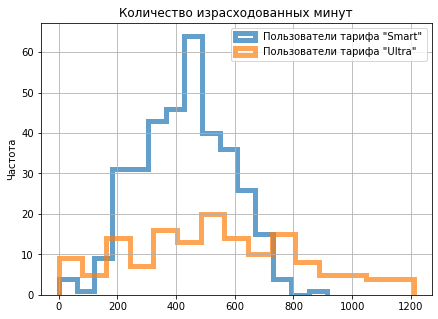

<Figure size 432x288 with 0 Axes>

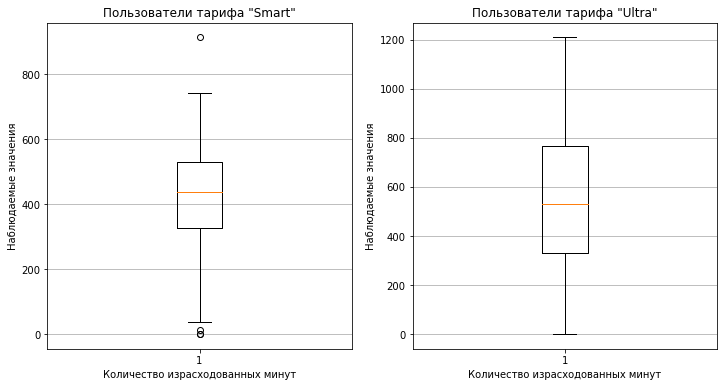

--------------- Количество отправленных сообщений ---------------

Описательная статистика для пользователей тарифа "Smart"

Среднее значение = 32.259907068240395
Медиана = 27.5
Дисперсия = 701.8781581237815
Cтандартное отклонение = 26.49298318656813

Описательная статистика для пользователей тарифа "Ultra"

Среднее значение = 53.66812080536912
Медиана = 45.0
Дисперсия = 2140.4332957974884
Cтандартное отклонение = 46.26481704057078



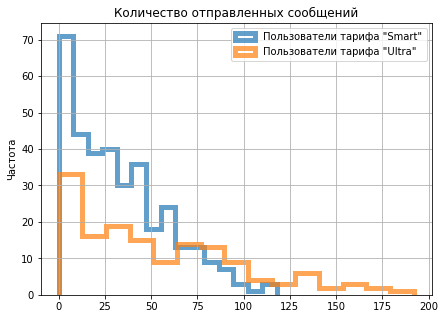

<Figure size 432x288 with 0 Axes>

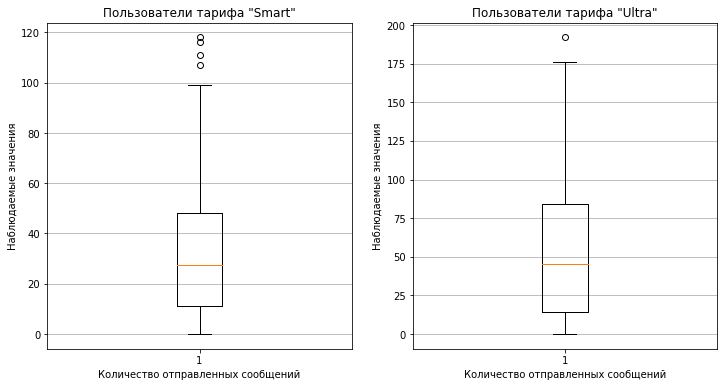

--------------- Объем израсходованного интернет-трафика ---------------

Описательная статистика для пользователей тарифа "Smart"

Среднее значение = 16163.184440045567
Медиана = 16276.57142857143
Дисперсия = 13526998.95124443
Cтандартное отклонение = 3677.906870931404

Описательная статистика для пользователей тарифа "Ultra"

Среднее значение = 19463.098738826422
Медиана = 18703.4
Дисперсия = 70843504.07664873
Cтандартное отклонение = 8416.858325803561



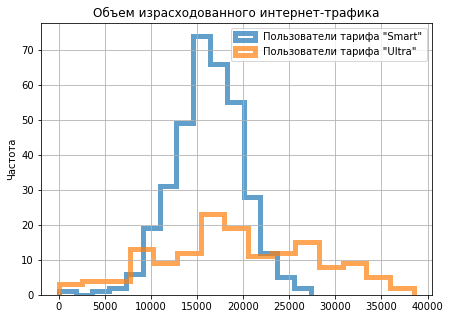

<Figure size 432x288 with 0 Axes>

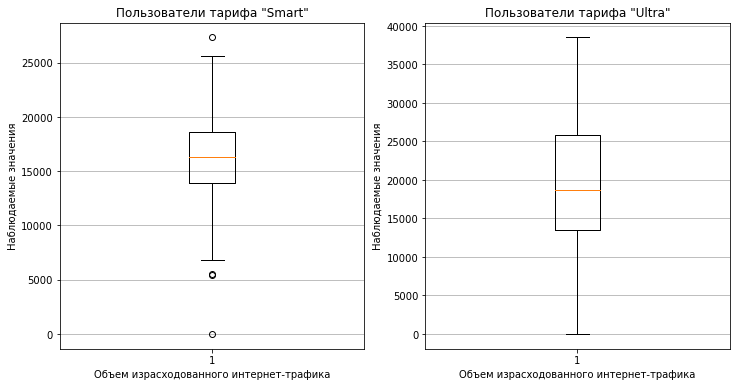

In [70]:
# Цикл будет выводить статистические характеристики, строить гистограммы и диаграммы размаха
# для пользователей разных тарифов
for col in columns.keys():
    print('-'*15, columns[col], '-'*15)
    print()
    print('Описательная статистика для пользователей тарифа "Smart"')
    #print(stat_smart[col].describe())
    print()
    print('Среднее значение =',stat_smart[col].mean())
    print('Медиана =',stat_smart[col].median())
    print('Дисперсия =', np.var(stat_smart[col]))
    print('Cтандартное отклонение =', np.std(stat_smart[col]))
    print()
    print('Описательная статистика для пользователей тарифа "Ultra"')
    #print(stat_ultra[col].describe())
    print()
    print('Среднее значение =',stat_ultra[col].mean())
    print('Медиана =',stat_ultra[col].median())
    print('Дисперсия =', np.var(stat_ultra[col]))
    print('Cтандартное отклонение =', np.std(stat_ultra[col]))
    print()
    
    
    ax = stat_smart.plot(kind='hist', y = col, 
                        histtype='step', bins=15, 
                        linewidth=5, alpha=0.7,figsize = (7,5), 
                        label='Пользователи тарифа "Smart"', title = columns[col])
    stat_ultra.plot(kind='hist', y = col, 
                    histtype='step', bins=15, 
                    linewidth=5, alpha=0.7, label='Пользователи тарифа "Ultra"', 
                    ax=ax, grid=True, legend=True)
    plt.ylabel("Частота")
    plt.show()
    
    box1 = stat_smart[col]
    box2 = stat_ultra[col]
    
    fig = plt.figure()
    fig, axes = plt.subplots(nrows = 1, ncols =2, figsize=(12, 6))
    
    axes[0].boxplot(box1)
    axes[0].set(title = 'Пользователи тарифа "Smart"')
    axes[1].boxplot(box2)    
    axes[1].set(title = 'Пользователи тарифа "Ultra"')
    
    for ax in axes:
        ax.yaxis.grid(True)
        ax.set_xlabel(columns[col])
        ax.set_ylabel('Наблюдаемые значения')
    plt.show()

---
##### ВЫВОД

**Израсходованные минуты** для пользователей каждого тарифа распределены нормально, практически симметрично относительно среднего значения. Диаграмма размаха выявила нетипичные значений для пользователей тарифа "Smart". Более 25% пользователей данного тарифа проговаривает больше минут, чем предусмотрено в рамках абонетской платы. В среднем клиенты тарифа "Ultra" ежемесячно разговаривают по телефону более чем на 100 минут больше. Это вполне объяснимо, учитывая условия данного тарифа.  

По **количеству отправленных сообщений** пользователи "Ultra" в среднем также опережают пользователей "Smart". Оба датасета распределены нормально и скошены вправо. Стоит отметить, что отправка смс не пользуюся большой популярностью у клиентов оператора, пики гистограммы находятся около нуля. Как и с минутами, около четверти пользователей тарифа "Smart" превышают установленый ежемесячный лимит.

Данные с информацией об **объёме израсходованного интернет-трафика** также имеют нормальное распределние. Датасет пользователей тарифа "Smart" относительно симметричен, а датасет пользователей "Ultra" скошен положительно. Примечательно, что среднее значение  потраченного интернет-трафика для пользователей тарифа "Smart" практически на 1 Гб выше включённого в абонентскую плату. Это значит, что большинству не хватает трафика в рамках 
тарифного пакета.

### Шаг 4. Проверка гипотез
---
<a id = "Step4"></a>

[1](#Step1)  [2](#Step2)  [3](#Step3)  [5](#Step5)  [Начало](#Head)

#### Необходимо проверить:

1. Отличается ли средняя выручка пользователей тарифов «Ультра» и «Смарт»?
2. Отличается ли средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов?

В обоих случаях предстоит сопоставить средние двух генеральных совокупностей, поэтому воспользуемся методом ***scipy.stats.ttest_ind()***

---
#### 1. Сравним среднюю выручку пользователей тарифов «Ультра» и «Смарт». Сформулируем гипотезы:

- **Нулевая гипотеза**: средняя выручка пользователей тарифов «Ультра» и «Смарт» равна.
- **Альтернативная гипотеза**: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

In [75]:
revenue_smart = stat[stat['tariff'] == 'smart']['revenue']
revenue_ultra = stat[stat['tariff'] == 'ultra']['revenue']

In [76]:
alpha = 0.05
results = st.ttest_ind(revenue_smart, revenue_ultra)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.759642839662383e-142
Отвергаем нулевую гипотезу


---
Полученное значение p-value говорит о том, что гипотеза о равенстве выручки пользователей "Смарт" и "Ультра" не подтвердилась, вероятность такого события слишком мала. 

---
#### 2. Сравним выручку абонентов из Москвы и жителей других городов. Сформулируем гипотезы:

- **Нулевая гипотеза**: средняя выручка пользователей из Москвы равна выручке пользователей из других регионов.
- **Альтернативная гипотеза**: средняя выручка пользователей из Москвы и выручка пользователей из других регионов различается.

In [77]:
revenue_moscow = stat[stat['city'] == 'Москва']['revenue']
revenue_other = stat[stat['city'] != 'Москва']['revenue']

In [78]:
alpha = 0.05
results = st.ttest_ind(revenue_moscow, revenue_other)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.6363887131432132
Не получилось отвергнуть нулевую гипотезу


Полученная вероятность выше уровня значимости. Это значит, что полученные данные не противоречат нулевой гипотезе и мы её не отвергаем. Таким образом можно сказать, что средняя выручка пользователей из Москвы и выручка пользователей из других регионов различается незначительно. 

Рассмотрим как данные распределены на графике и наглядно убедимся в результате статистического теста.

Text(0, 0.5, 'Частота')

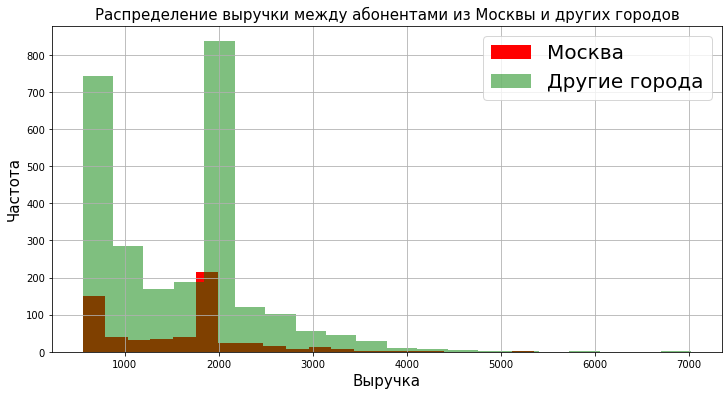

In [79]:
revenue_moscow.hist(bins = 20, color = 'red', figsize = (12,6), label = 'Москва')
revenue_other.hist(bins = 20, alpha = 0.5, color = 'green', label = 'Другие города')
plt.title('Распределение выручки между абонентами из Москвы и других городов', size = 15)
plt.legend(prop={'size': 20})
plt.xlabel('Выручка', size = 15)
plt.ylabel('Частота', size = 15)

Полученные графики довольно похожи.

In [80]:
stat.pivot_table(index = 'tariff', values = 'revenue', aggfunc = ['count', 'sum', 'mean'])

,count,sum,mean
,revenue,revenue,revenue
tariff,,,
smart,2230,2951140,1323.381166
ultra,986,2044050,2073.073022


<Figure size 432x288 with 0 Axes>

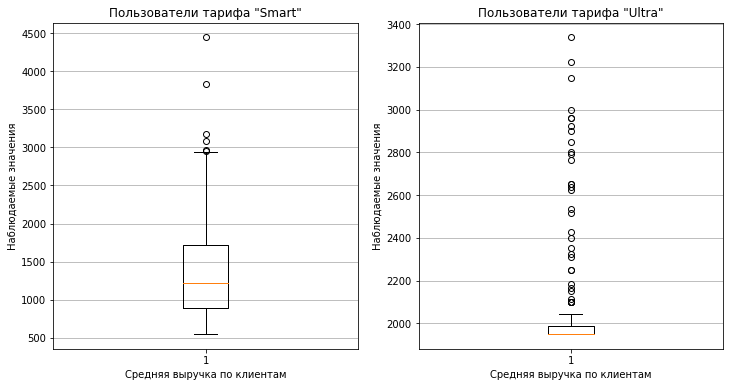

In [81]:
box1 = stat_smart['revenue']
box2 = stat_ultra['revenue']
    
fig = plt.figure()
fig, axes = plt.subplots(nrows = 1, ncols =2, figsize=(12, 6))
    
axes[0].boxplot(box1)
axes[0].set(title = 'Пользователи тарифа "Smart"')

axes[1].boxplot(box2)    
axes[1].set(title = 'Пользователи тарифа "Ultra"')

for ax in axes:
    ax.yaxis.grid(True)
    ax.set_xlabel('Средняя выручка по клиентам')
    ax.set_ylabel('Наблюдаемые значения')

### Шаг 5. Общий вывод по проекту
---
<a id = "Step5"></a>

Ссылки на этапы работы: [1](#Step1)  [2](#Step2)  [3](#Step3)  [4](#Step4)  [Начало](#Head)

  В ходе работы был проведен анализ тарифов на выборке из 500 клиентов. Рассматривались два тарифных плана: «Смарт» и «Ультра». Предварительно данные прошли предобработку, были рассчитаны дополнительные параметры. 

  *По результатам анализа тарифов было выявлено следующее:*
> *Пользователи тарифа "Смарт" в среднем ежемесячно разговаривают около 430 минут, отправляют 32 сообщения и используют 16163 мегабайта трафика.*

> *Пользователи тарифа "Ультра" в среднем используют 538 минут, 53 сообщения и 19463 мб интернет-трафика в месяц.*

  При этом пользователям "Смарт" характерно выходить за рамки предусмотренных абонентской платой лимитов. Особенно это касается мобильного интернета. Более половины пользователей докупают как минимум 1 Гб трафика дополнительно. 
Среди абонентов тарифа "Ультра" такое поведение нетипично. 

  Была проведена проверка гипотез с помощью t-теста с уровнем значимости 5%. Гипотеза о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается, была подтверждена. В свою очередь гипотеза, что средняя выручка абонентов из Москвы отличается от выручки абонентов из других регионов, не подтвердилась. Это говорит нам о том, что место проживания клиента не оказывет большого влияния на пользование услугами оператора сотовой связи.

  Установлено, что в среднем пользователи тарифа "Смарт" платили 1323 рубля ежемесячно, что более чем в два раза выше ежемесячного платежа. Средняя выручка от пользователей тарифа "Ультра" составила 2073 рубля, при абонентской плате 1950 руб. 

  **Таким образом рекомендуется скорректировать бюджет в пользу тарифа "Смарт", потому что пользователей данного тарифа больше и очень часто их траты на услуги связи в разы превышают сумму, предусмотренную абонентской платой.**